<a href="https://colab.research.google.com/github/RahafSh/LA-Project/blob/master/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Project**


##Learning Objectives:

 
* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it




#Formulate  the problem

Prediction of next semester cgpa is very difficult. Prediction of next semester cgpa can be done by analyzing the past performance of a student.

**Loading the dataset from Kaggle website**  
[Click here](https://www.kaggle.com/sankha1998/student-semester-result)

In [287]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Data

In [288]:
#Load the dataset

file_path = '/content/data.csv'

In [289]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16
...,...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17048.0,NaN,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049.0,NaN,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050.0,NaN,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051.0,NaN,28


#Data Exploration

In [290]:
#Use the method head() to display the first five rows of the dataframe.
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


#Clean Data

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          132 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  178 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


#Missing data values

In [292]:
# 1. Identify missing values

df.isnull().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        132
Subject Code      0
dtype: int64

In [293]:
df.isnull().sum().sum()

198

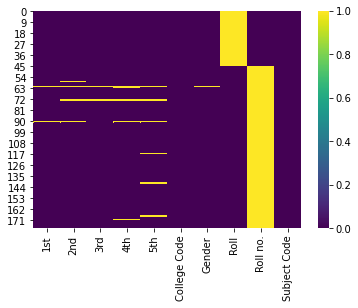

In [294]:
# Check if there is any missing value

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [295]:
#Convert "?" to NaN

import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(10)

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16
5,7.33,6.72,6.48,6.50,7.39,115,Male,NaN,17025.0,16
6,7.15,6.72,6.89,6.86,7.64,115,Male,NaN,17026.0,16
7,6.74,6.38,4.93,5.64,6.75,115,Male,NaN,17027.0,16
8,7.89,7.45,6.96,7.71,8.00,115,Female,NaN,17028.0,16
9,7.30,6.34,6.30,6.61,6.18,115,Male,NaN,17029.0,16


In [296]:
# 2. Deal with missing data

# Drop the whole row

# 1st,2nd,3rd,4th,5th has NaN
# simply drop whole row with NaN 

df.dropna(subset=["1st"], axis=0, inplace=True)
df.dropna(subset=["2nd"], axis=0, inplace=True)
df.dropna(subset=["3rd"], axis=0, inplace=True)
df.dropna(subset=["4th"], axis=0, inplace=True)
df.dropna(subset=["5th"], axis=0, inplace=True)

In [297]:
# Drop the whole column

# Roll we have 46 NaN
# simply drop whole Roll column with NaN 
df.drop(["Roll"], axis=1, inplace=True)

In [298]:
# Replace by sklearn.impute

# Roll no. has 132 NaN
#import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')# mean , median , most_frequent , (constant ==fill_value)
df['Roll no.'] = imr.fit_transform(df[['Roll no.']])

# After impute
df['Roll no.'].isnull().sum()

0

In [299]:
df.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Roll no.        0
Subject Code    0
dtype: int64

In [300]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,17024.0,16


In [301]:
# 3. Correct data format

df['Roll no.'].dtypes

dtype('float64')

In [302]:
df['Roll no.'] = df['Roll no.'].astype('int')

In [303]:
df['Roll no.'].dtype

dtype('int64')

In [304]:
# Indicator variable (or dummy variable)
df['Gender'].unique()

array(['Female', 'Male', 'M', 'F'], dtype=object)

In [305]:
dummy_variable = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_variable

,Gender_F,Gender_Female,Gender_M,Gender_Male
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
173,1,0,0,0
174,0,0,1,0
175,0,0,1,0
176,0,0,1,0


In [306]:
#LabelEncoder

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in the column itself
df['Subject Code'] = labelencoder.fit_transform(df['Subject Code'].astype(str))
df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,17020,0
1,6.48,5.90,4.15,4.29,4.96,115,Male,17021,0
2,8.41,8.24,7.52,8.25,7.75,115,Female,17022,0
3,7.33,6.83,6.33,6.79,6.89,115,Male,17023,0
4,7.89,7.34,7.22,7.32,7.46,115,Male,17024,0
...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17042,1
174,7.30,6.41,6.59,7.11,7.38,241,M,17042,1
175,6.30,6.28,5.89,5.71,6.50,241,M,17042,1
176,7.04,7.10,6.81,7.00,6.92,241,M,17042,1


In [307]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
One_hot_encoder = OneHotEncoder(handle_unknown='ignore')
# passing the column (label encoded values)
enc_df = pd.DataFrame(One_hot_encoder.fit_transform(df[['College Code']]).toarray())
enc_df

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
164,0.0,0.0,0.0,1.0
165,0.0,0.0,0.0,1.0
166,0.0,0.0,0.0,1.0
167,0.0,0.0,0.0,1.0


In [308]:
df = df.drop_duplicates()

In [309]:
df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,17020,0
1,6.48,5.90,4.15,4.29,4.96,115,Male,17021,0
2,8.41,8.24,7.52,8.25,7.75,115,Female,17022,0
3,7.33,6.83,6.33,6.79,6.89,115,Male,17023,0
4,7.89,7.34,7.22,7.32,7.46,115,Male,17024,0
...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17042,1
174,7.30,6.41,6.59,7.11,7.38,241,M,17042,1
175,6.30,6.28,5.89,5.71,6.50,241,M,17042,1
176,7.04,7.10,6.81,7.00,6.92,241,M,17042,1


In [310]:
df['Gender'].unique()

array(['Female', 'Male', 'M', 'F'], dtype=object)

In [311]:
df.replace("Female", 'F', inplace = True)
df.replace("Male", 'M', inplace = True)
df.replace("M", 'M', inplace = True)
df.replace("F", 'F', inplace = True)

In [312]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

*Data Normalization*


#Discover and Visualize Data to Gain Insight 

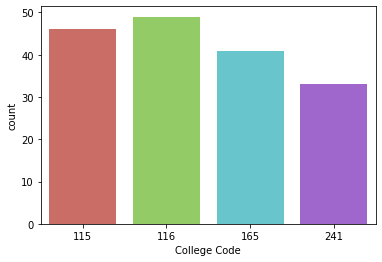

In [313]:
sns.countplot(x='College Code',data=df, palette='hls')


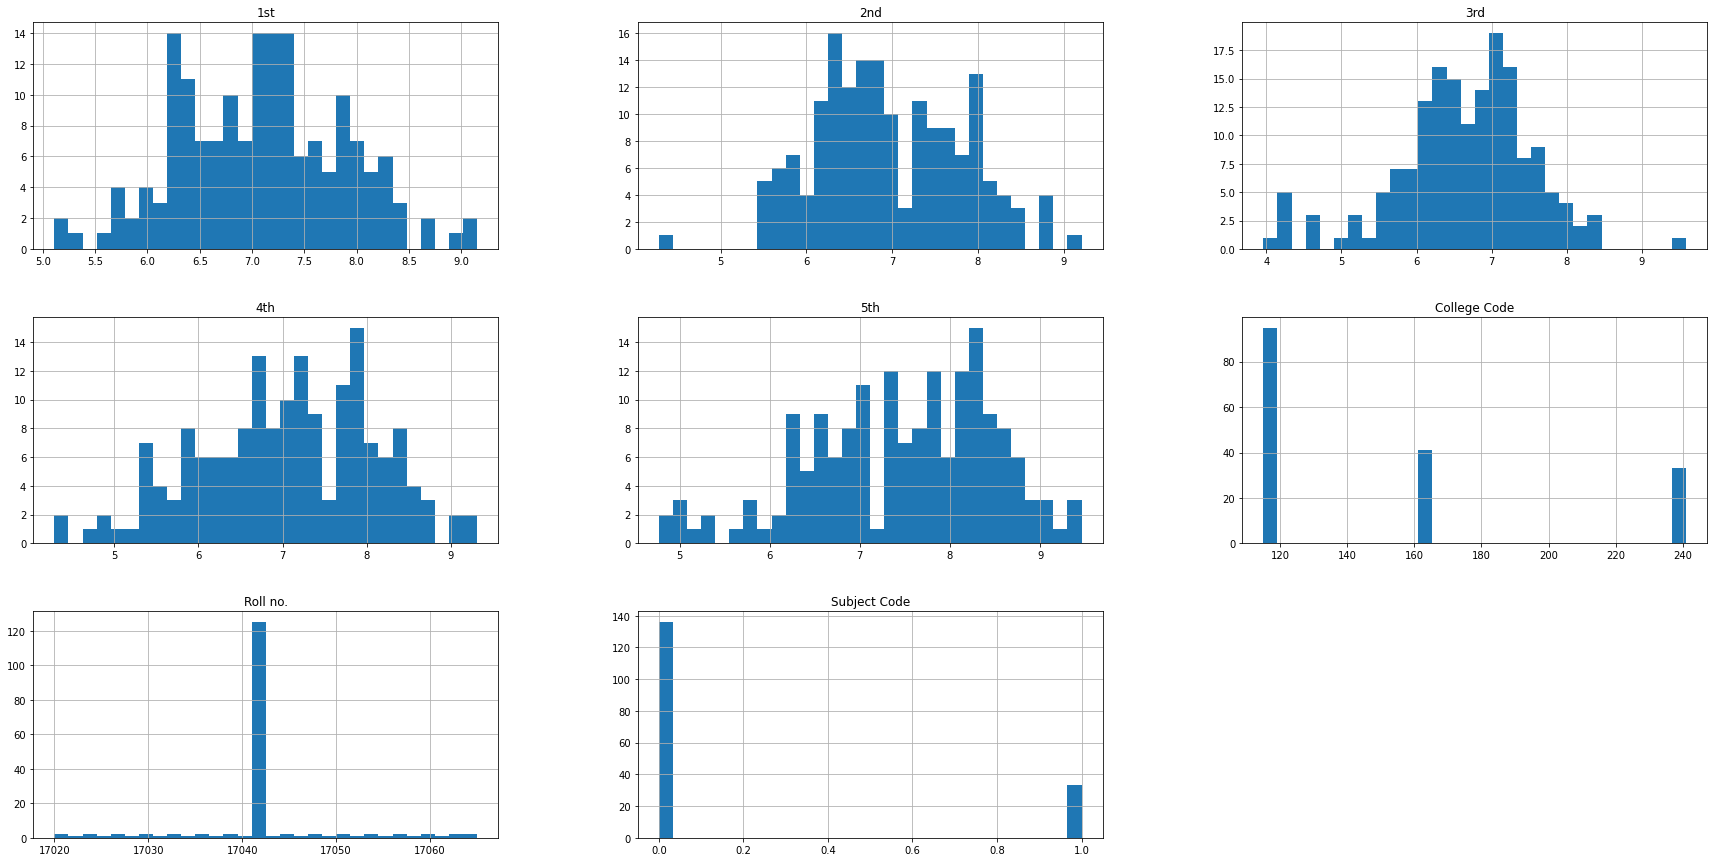

In [314]:
# show all data (not string or opject)
df.hist(bins=30,figsize=(30,15))
plt.show()

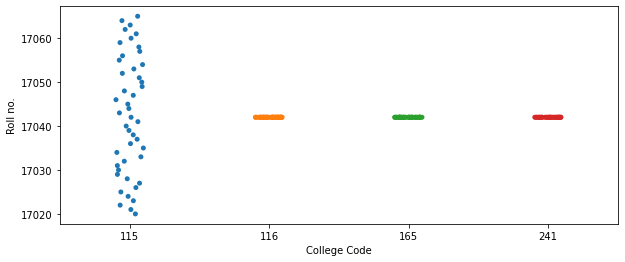

In [315]:

plt.figure(figsize=(10, 4))
sns.stripplot(x="College Code", y="Roll no.", data=df);

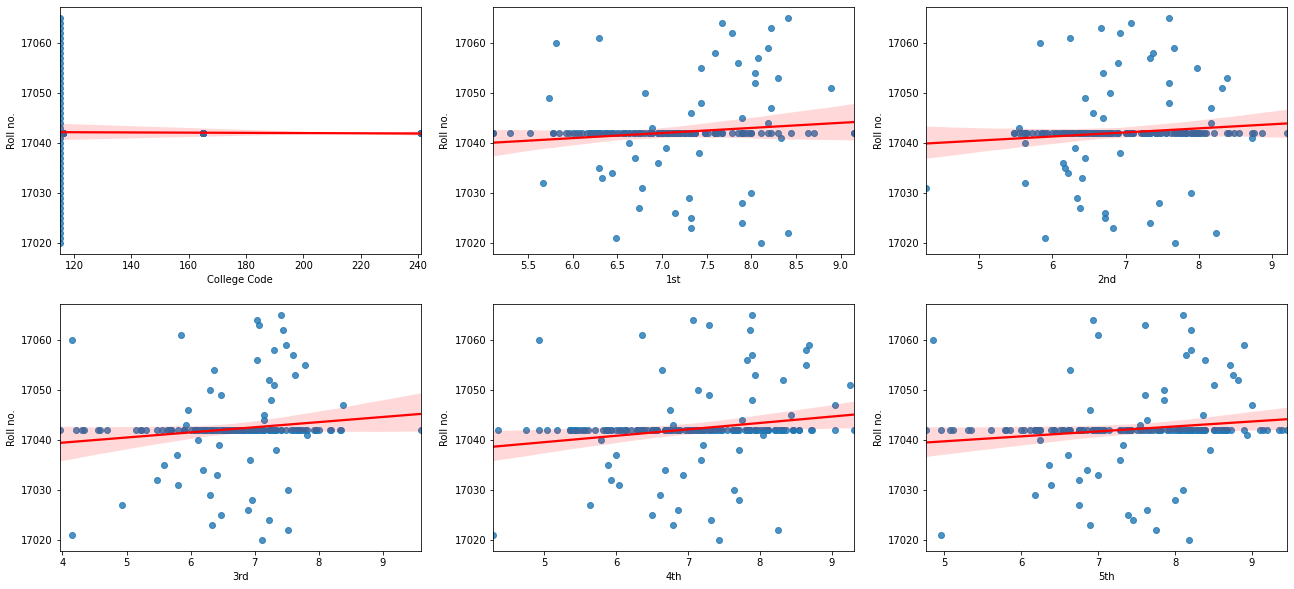

In [316]:
plt.figure(figsize=(22,10))

plt.subplot(231)#subplot to add a subplot to the current figure
sns.regplot(x='College Code', y='Roll no.', data=df,  line_kws={'color': 'red'}) 

plt.subplot(232)
sns.regplot(x='1st', y='Roll no.', data=df , line_kws={'color': 'red'})
                    
plt.subplot(233)
sns.regplot(x='2nd', y='Roll no.', data=df,  line_kws={'color': 'red'})

plt.subplot(234)
sns.regplot(x='3rd', y='Roll no.', data=df , line_kws={'color': 'red'})
          
plt.subplot(235)
sns.regplot(x='4th', y='Roll no.', data=df , line_kws={'color': 'red'})

plt.subplot(236)
sns.regplot(x='5th', y='Roll no.', data=df , line_kws={'color': 'red'})

#Looking for correlations

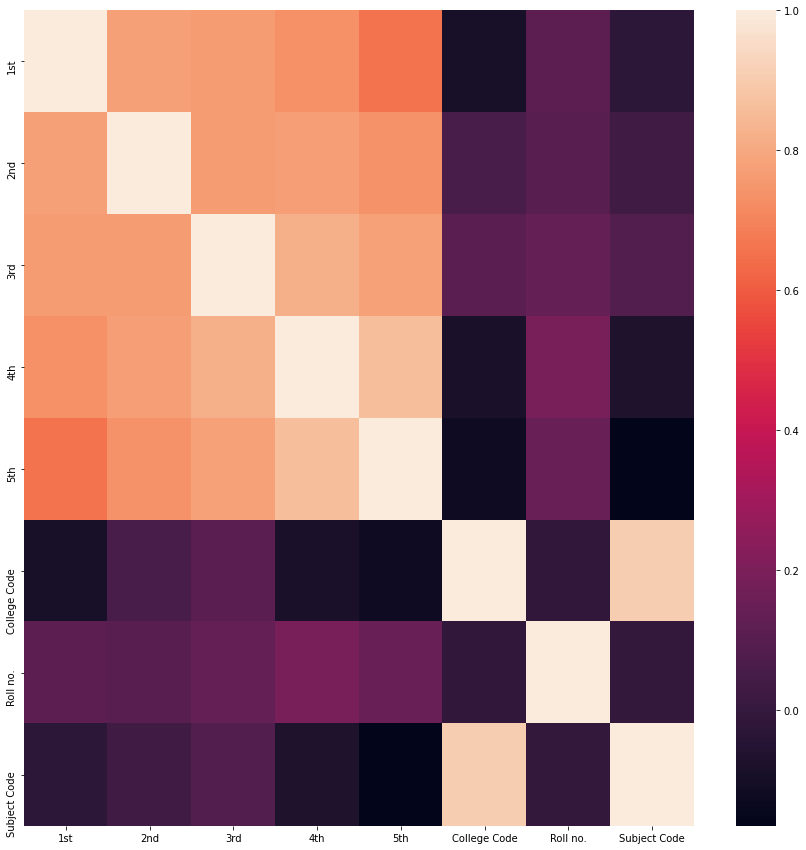

In [317]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [318]:
df.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll no.,Subject Code
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,7.090059,6.964201,6.641953,7.045562,7.469586,152.023669,17042.136095,0.195266
std,0.792388,0.852932,0.917944,1.036915,1.020556,48.476793,6.950450,0.397584
min,5.110000,4.280000,3.960000,4.290000,4.770000,115.000000,17020.000000,0.000000
25%,6.480000,6.380000,6.190000,6.360000,6.750000,115.000000,17042.000000,0.000000
50%,7.110000,6.810000,6.700000,7.110000,7.610000,116.000000,17042.000000,0.000000
75%,7.590000,7.620000,7.260000,7.860000,8.210000,165.000000,17042.000000,0.000000
max,9.150000,9.210000,9.590000,9.310000,9.460000,241.000000,17065.000000,1.000000


In [319]:
df['Avg']=(df['1st']+df['2nd']+df['3rd']+df['4th']+df['5th'])/5

In [320]:
df['College Code']=df['College Code'].astype(str)
df['Subject Code']=df['Subject Code'].astype(str)
df['Roll no.']=df['Roll no.'].astype(str)

In [321]:
df['StudentID']=df['College Code']+df['Subject Code']+df['Roll no.']

In [322]:
df.drop(columns=['Subject Code','Roll no.'],inplace=True)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           169 non-null    float64
 1   2nd           169 non-null    float64
 2   3rd           169 non-null    float64
 3   4th           169 non-null    float64
 4   5th           169 non-null    float64
 5   College Code  169 non-null    object 
 6   Gender        169 non-null    object 
 7   Avg           169 non-null    float64
 8   StudentID     169 non-null    object 
dtypes: float64(6), object(3)
memory usage: 18.2+ KB


In [324]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Avg,StudentID
0,8.11,7.68,7.11,7.43,8.18,115,F,7.702,115017020
1,6.48,5.90,4.15,4.29,4.96,115,M,5.156,115017021
2,8.41,8.24,7.52,8.25,7.75,115,F,8.034,115017022
3,7.33,6.83,6.33,6.79,6.89,115,M,6.834,115017023
4,7.89,7.34,7.22,7.32,7.46,115,M,7.446,115017024


In [325]:
df.columns

Index(['1st', '2nd', '3rd', '4th', '5th', 'College Code', 'Gender', 'Avg',
       'StudentID'],
      dtype='object')

In [326]:
selected_features = ['1st','2nd','3rd','4th','5th','College Code','StudentID','Avg']
df_final = df[selected_features]
df_final

,1st,2nd,3rd,4th,5th,College Code,StudentID,Avg
0,8.11,7.68,7.11,7.43,8.18,115,115017020,7.702
1,6.48,5.90,4.15,4.29,4.96,115,115017021,5.156
2,8.41,8.24,7.52,8.25,7.75,115,115017022,8.034
3,7.33,6.83,6.33,6.79,6.89,115,115017023,6.834
4,7.89,7.34,7.22,7.32,7.46,115,115017024,7.446
...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,241117042,7.748
174,7.30,6.41,6.59,7.11,7.38,241,241117042,6.958
175,6.30,6.28,5.89,5.71,6.50,241,241117042,6.136
176,7.04,7.10,6.81,7.00,6.92,241,241117042,6.974


In [327]:
numerical = ['1st','2nd','3rd','4th','5th','College Code','StudentID','Avg']

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


In [328]:
df_final

,1st,2nd,3rd,4th,5th,College Code,StudentID,Avg
0,8.11,7.68,7.11,7.43,8.18,115,115017020,7.702
1,6.48,5.90,4.15,4.29,4.96,115,115017021,5.156
2,8.41,8.24,7.52,8.25,7.75,115,115017022,8.034
3,7.33,6.83,6.33,6.79,6.89,115,115017023,6.834
4,7.89,7.34,7.22,7.32,7.46,115,115017024,7.446
...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,241117042,7.748
174,7.30,6.41,6.59,7.11,7.38,241,241117042,6.958
175,6.30,6.28,5.89,5.71,6.50,241,241117042,6.136
176,7.04,7.10,6.81,7.00,6.92,241,241117042,6.974


In [329]:
df_final.to_csv('cleaned_data.csv')

#Prepare the date for Machine Learning Algorithm

In [330]:
# Input data
columns = ['1st','2nd','3rd','4th','5th','College Code','StudentID']
labels = df_final['Avg'].values
features = df_final[list(columns)].values

In [331]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [332]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
regression = linear_model.LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [333]:
# Predict


# Predict for training set
y_train_predict = regression.predict(X_train)

# Predict for training set
y_test_predict = regression.predict(X_test)

In [334]:
# Evaluate model performance

from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 1.57802900992988e-09
MAE is 1.3157499496709518e-09
---------------------------------------
The model performance for testing set
RMSE is 1.4851490919051389e-09
MAE is 1.2014560152862281e-09
---------------------------------------
The score of model for testing set
Test score 1.0


In [335]:

compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,5.980,5.980
1,6.542,6.542
2,7.704,7.704
3,6.624,6.624
4,7.446,7.446
5,8.560,8.560
6,8.034,8.034
7,7.432,7.432
8,7.336,7.336
9,6.980,6.980


In [336]:
# Visualize the Result
idx= np.random.choice(X_test.shape[0])
print ("Predicted avg gpa :", y_test_predict[idx])
print ("Actual avg gpa :", y_test[idx])

Predicted avg gpa : 5.859999999668867
Actual avg gpa : 5.86


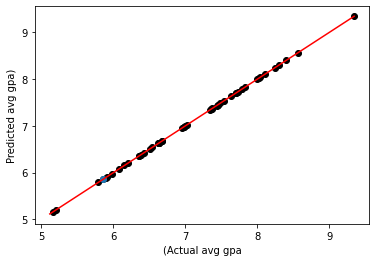

In [337]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('(Actual avg gpa')
plt.ylabel('Predicted avg gpa)')
plt.plot([df['Avg'].min(), df['Avg'].max()], [df['Avg'].min(), df['Avg'].max()], color='red')
plt.show()

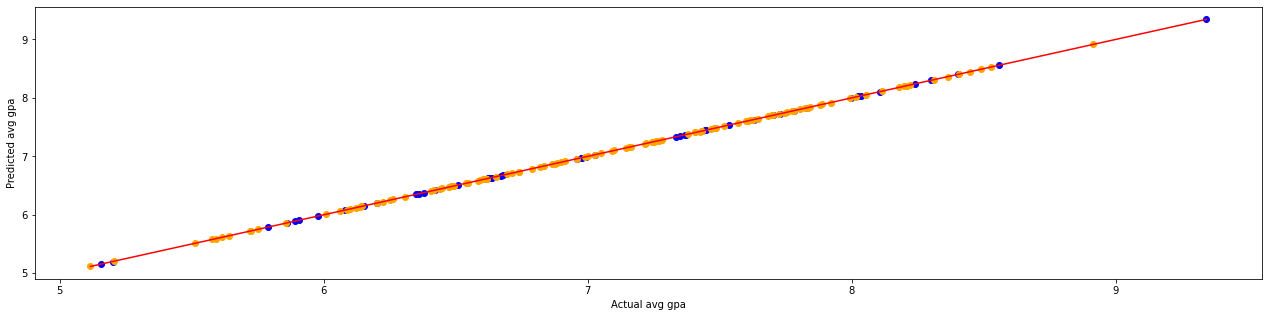

In [338]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['Avg'].min(), df['Avg'].max()], [df['Avg'].min(), df['Avg'].max()], color='red')
plt.xlabel('Actual avg gpa')
plt.ylabel('Predicted avg gpa')
plt.show()

#Save Cleaned Data and Download it

In [340]:
# Save the model

import pickle
filename='model.pkl'

pickle.dump(regression, open(filename, 'wb')) 

In [341]:

# Load the saved model
model_load = pickle.load(open(filename, 'rb')) 

In [342]:
model_load.coef_

array([2.00000001e-01, 2.00000000e-01, 2.00000000e-01, 1.99999999e-01,
       2.00000000e-01, 3.36090177e-12, 2.77555756e-17])

In [343]:
model_load.intercept_

-6.338535918359867e-09

In [344]:
# downlodel your model

from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>